# Multiple linear regression (Medical Insurance Cost)
## About Dataset
##### Content
Health Insurance is medical coverage that helps you meet your medical expenses by offering financial assistance. Due to the high cost of hospitalization expenses, it is important to have a health insurance plan in place. In the current pandemic situation, health insurance plays a vital role in safeguarding your finances.

##### Problem Statement & Objective
Imagine yourself working as a data scientist in an insurance company. Your manager asked you to come up with a data science solution to estimate the medical cost of an individual who has bought health insurance in the institution. Build a machine learning model to estimate the medical cost of an individual.

##### Variables
The train dataset contains seven variables including the target variable i.e. charges. These variables are:

age: age of primary beneficiary. (if the age is given in decimal, consider it as the nearest integer, for example, if age = 19.1, it's nearest integer is 19, if age = 22.6, it's nearest integer is 23)\
sex: insurance contractor gender, female, male\
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,\
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9\
children: Number of children covered by health insurance / Number of dependents\
smoker: Smoking\
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.\
charges: Individual medical costs billed by health insurance\

##### where to get the dataset
url = https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?resource=download

### Import packages and load dataset

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math

%matplotlib inline
np.random.seed(42)

In [22]:
# import insurance dataset 
# we have 300 rows and 6 columns of data
df = pd.read_csv('insurance.csv', usecols = ['age','sex','bmi','children','smoker','charges'])
df = df.sample(n = 300, random_state = 42)
df

,age,sex,bmi,smoker,children,charges
693,49.072354,female,32.003954,no,4,11023.443506
3220,39.840956,female,31.944934,no,2,6999.274662
432,24.000000,male,35.860000,no,0,1986.933400
183,59.000000,female,30.596183,no,2,12927.131694
2620,22.629266,male,30.006692,no,4,17500.205729
...,...,...,...,...,...,...
790,35.109946,male,39.401600,no,4,20633.869251
1345,49.940613,male,26.906427,yes,3,25111.433750
2509,41.551239,male,31.214778,no,5,9143.573653
1044,52.000000,male,34.485000,yes,3,60021.398970


In [4]:
# change categorical value to numerical value 
df['sex'] = df['sex'] .astype('category')
df['sex'] = df['sex'] .cat.codes

df['smoker'] = df['smoker'] .astype('category')
df['smoker'] = df['smoker'] .cat.codes

In [5]:
# see top 5 rows
df.head()

,age,sex,bmi,smoker,children,charges
693,49.072354,0,32.003954,0,4,11023.443506
3220,39.840956,0,31.944934,0,2,6999.274662
432,24.000000,1,35.860000,0,0,1986.933400
183,59.000000,0,30.596183,0,2,12927.131694
2620,22.629266,1,30.006692,0,4,17500.205729


In [6]:
# the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 693 to 538
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    float64
 1   sex       300 non-null    int8   
 2   bmi       300 non-null    float64
 3   smoker    300 non-null    int8   
 4   children  300 non-null    int64  
 5   charges   300 non-null    float64
dtypes: float64(3), int64(1), int8(2)
memory usage: 12.3 KB


### Plot dataset (Histogram and scatter plots)

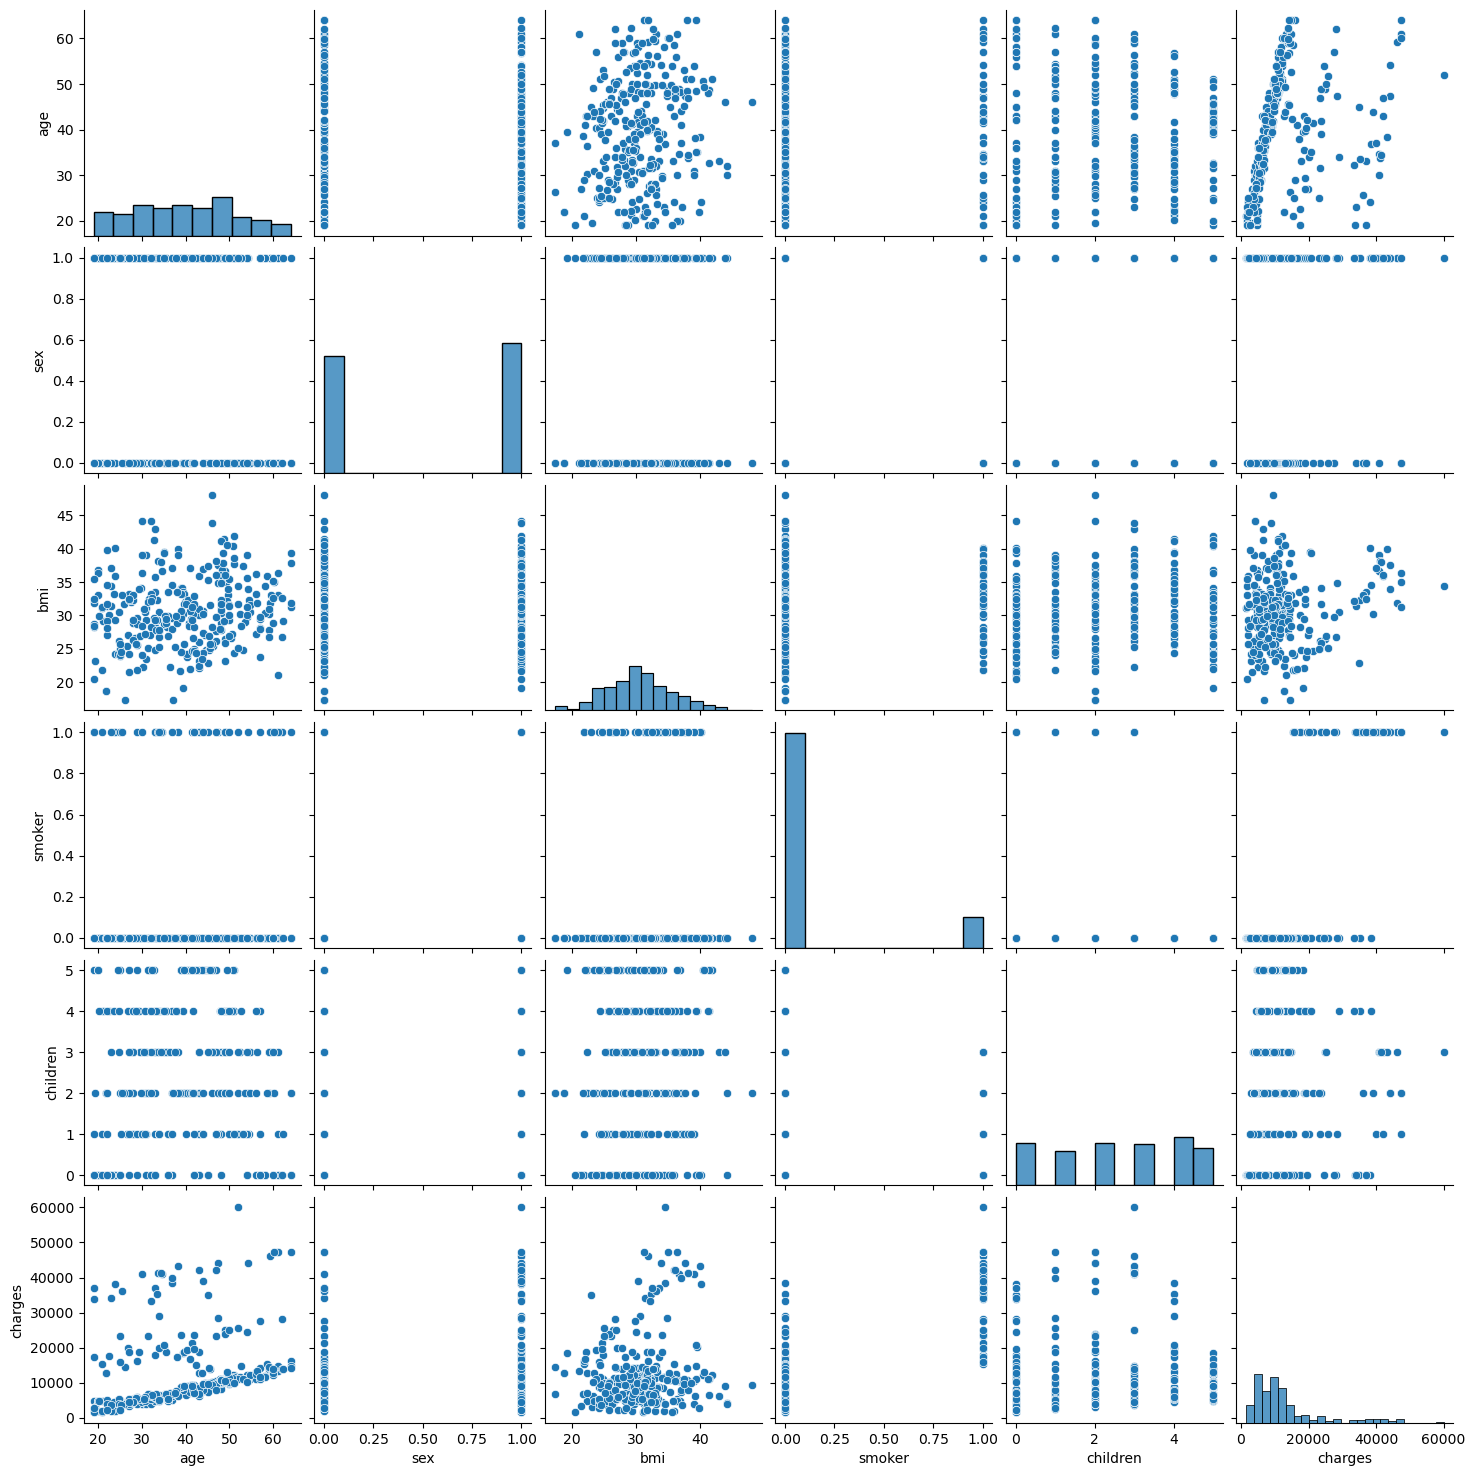

In [7]:
# seaborn pairplot
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data 
# will by shared across the y-axes across a single row and the x-axes across a single column.

# The diagonal plots are treated differently: a univariate distribution plot is drawn 
# to show the marginal distribution of the data in each column.
sns.pairplot(df)

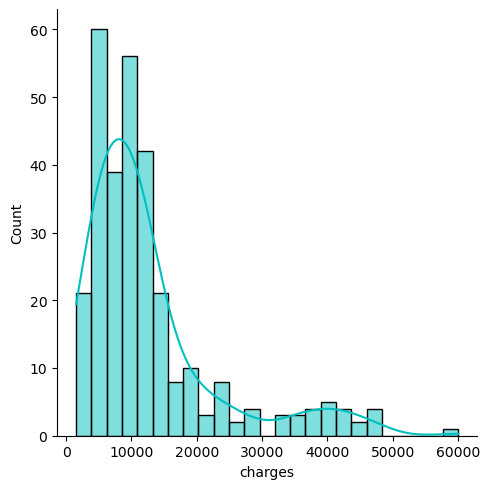

In [8]:
# the price vary greatly making it hard to do linear regression
sns.displot(df['charges'], kde = True, color = 'c')

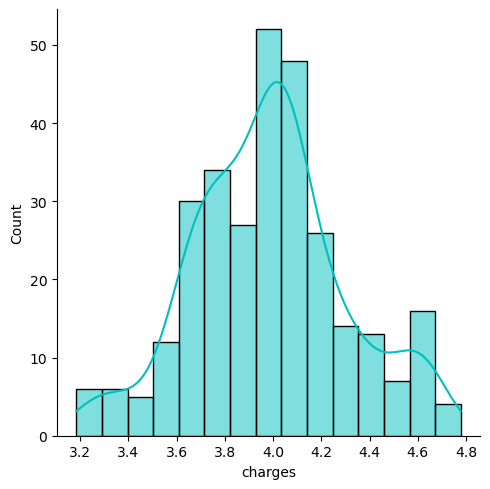

In [9]:
# the price vary greatly making it hard to do linear regression
sns.displot(np.log10(df['charges']), kde = True, color = 'c')

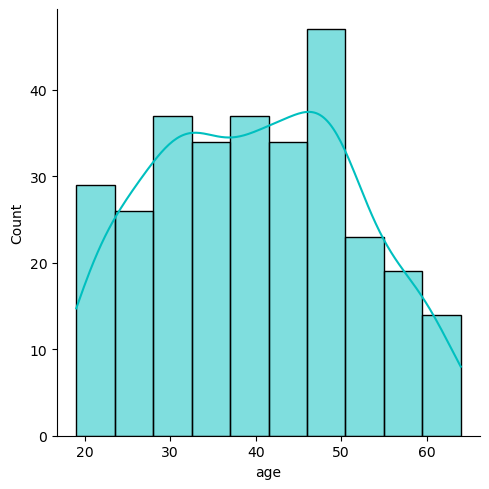

In [10]:
# distribution of age
sns.displot(df['age'], kde = True, color = 'c')

1    158
0    142
Name: sex, dtype: int64


<BarContainer object of 2 artists>

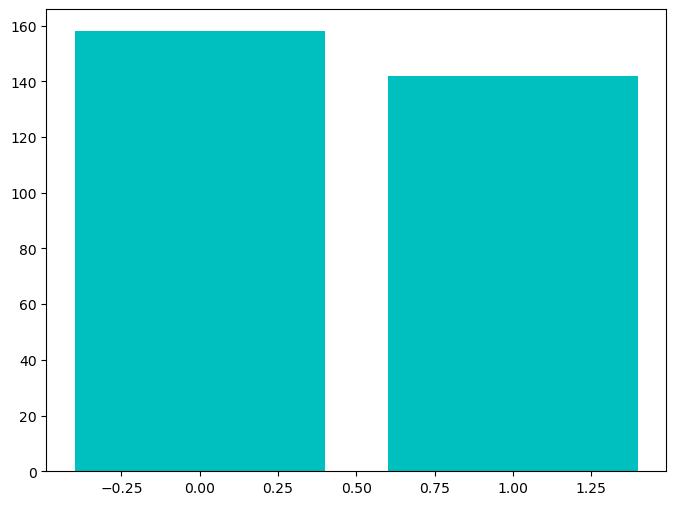

In [11]:
# barplot for the number of patients based on sex
print(df['sex'].value_counts())
plt.figure(figsize = (8,6))
plt.bar(df['sex'].unique(), df['sex'].value_counts(), color = 'c')

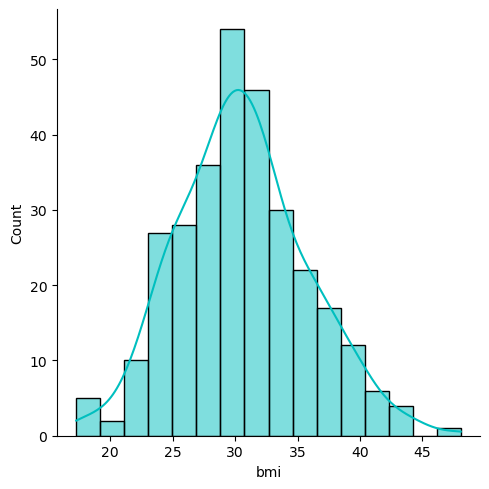

In [12]:
# distribution of bmi
sns.displot(df['bmi'], kde = True, color = 'c')

0    262
1     38
Name: smoker, dtype: int64


<BarContainer object of 2 artists>

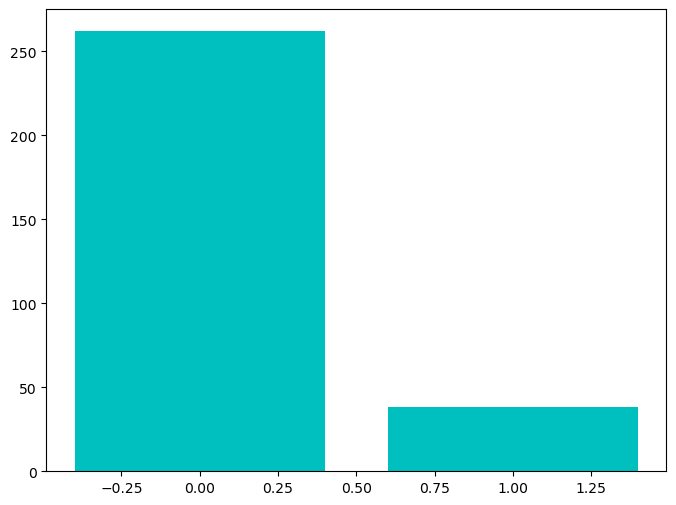

In [13]:
# barplot for the number of patients based on sex
print(df['smoker'].value_counts())
plt.figure(figsize = (8,6))
plt.bar(df['smoker'].unique(), df['smoker'].value_counts(), color = 'c')

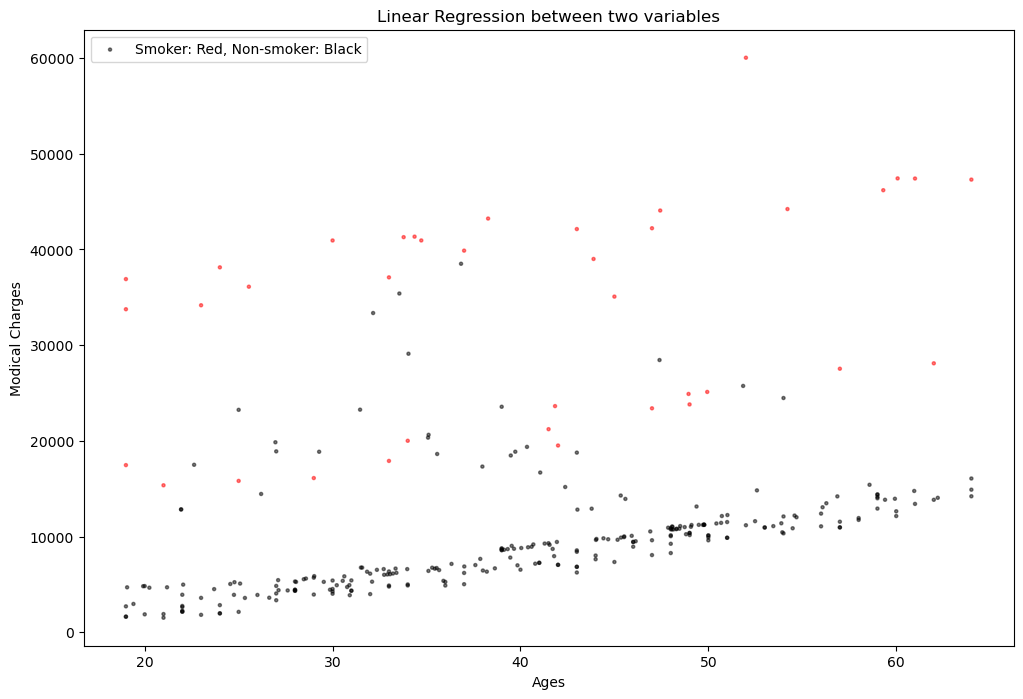

In [23]:
plt.figure(figsize = (12,8))
colors = {'yes': 'red', 'no': 'black'}
plt.scatter(df['age'],df['charges'], color = df['smoker'].map(colors),s = 5, alpha = 0.5, label = 'Smoker: Red, Non-smoker: Black')
plt.xlabel('Ages')
plt.ylabel('Modical Charges')
plt.title('Linear Regression between two variables')
plt.legend()

### Descriptive statistics
mean, min, max, percentile and standard deviation

In [15]:
# describe data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,300.0,39.821529,11.743588,19.000000,30.460268,39.920478,48.845865,64.00000
sex,300.0,0.526667,0.500123,0.000000,0.000000,1.000000,1.000000,1.00000
bmi,300.0,30.564458,5.192279,17.279576,26.986557,30.214883,33.504985,48.07000
smoker,300.0,0.126667,0.333155,0.000000,0.000000,0.000000,0.000000,1.00000
children,300.0,2.540000,1.694492,0.000000,1.000000,3.000000,4.000000,5.00000
charges,300.0,12549.905825,10423.830286,1526.312000,5974.832921,9848.920463,14013.743831,60021.39897


### Correlation heatmap

In [16]:
# set independent and dependent variable
X = df[['age','sex','bmi','smoker',]]
X = sm.add_constant(X)
y = df['charges']

<Axes: >

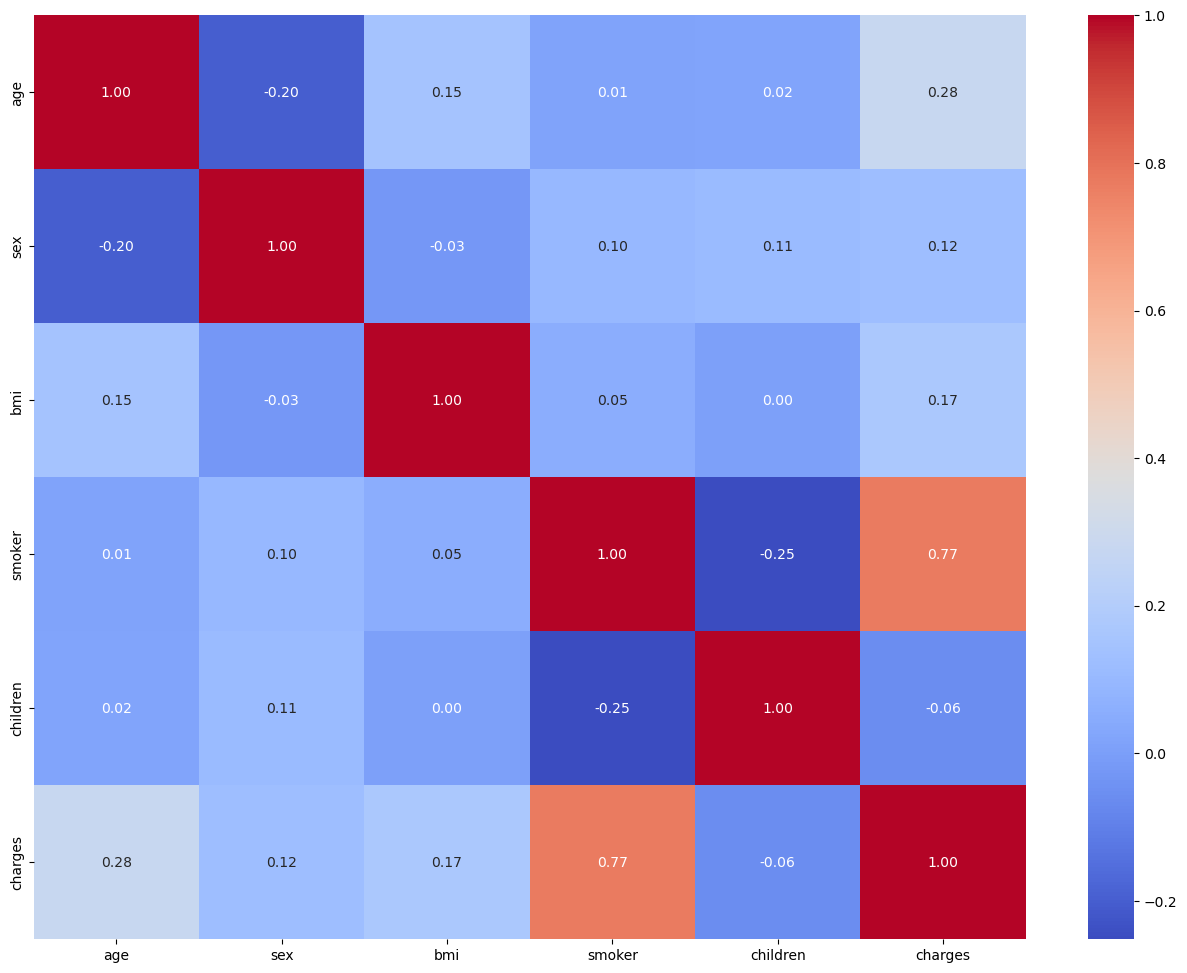

In [17]:
# seaborn heatmap
plt.figure(figsize = (16,12))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### Multiple linear regression analysis 

In [18]:
# use statsmodels OLS to fit multiple linear model 
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     161.2
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           6.07e-73
Time:                        12:15:23   Log-Likelihood:                -3026.9
No. Observations:                 300   AIC:                             6064.
Df Residuals:                     295   BIC:                             6082.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6975.0210   2286.948     -3.050      0.002   -1.15e+04   -2474.221
age          243.9303     29.891      8.161      0.000     185.104     302.757
sex         2155.4145    698.058      3.088      0.002     781.609    3529.220
bmi          186.2024     66.295      2.809      0.005      55.731     316.674
smoker      2.356e+04   1027.718     22.929      0.000    2.15e+04    2.56e+04
==============================================================================
Omnibus:                      107.503   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              388.302
Skew:                           1.531   Prob(JB):                     4.80e-85
Kurtosis:                       7.657   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

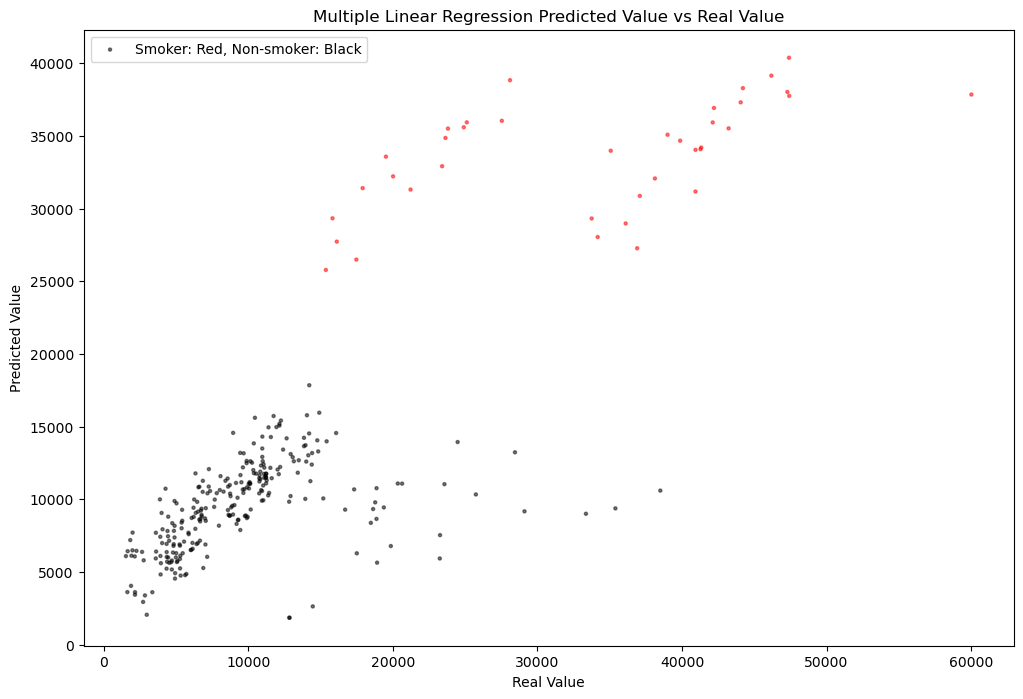

In [24]:
# plot the predicted value and real value using seaborn regression plot
# plot based on smoker or non smoker

plt.figure(figsize = (12,8))
colors = {'yes': 'red', 'no': 'black'}
plt.scatter(y,model.predict(), color = df['smoker'].map(colors),s = 5, alpha = 0.5, label = 'Smoker: Red, Non-smoker: Black')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Multiple Linear Regression Predicted Value vs Real Value')
plt.legend()

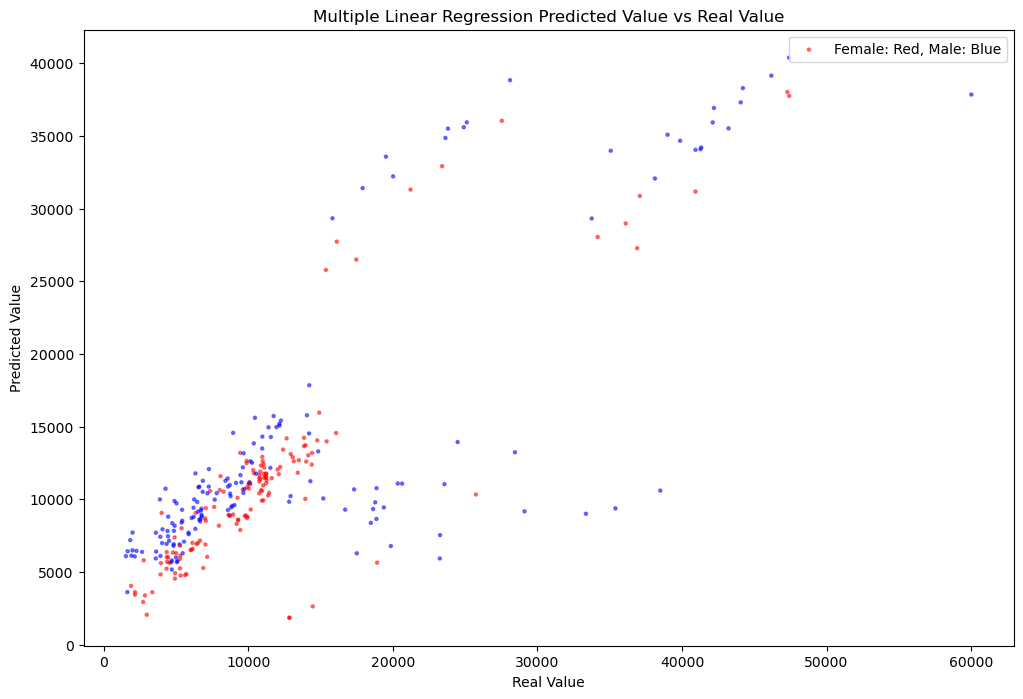

In [25]:
# plot the predicted value and real value using seaborn regression plot
# plot based on sex

plt.figure(figsize = (12,8))
colors = {'female': 'red', 'male': 'blue'}
plt.scatter(y,model.predict(), color = df['sex'].map(colors),s = 5, alpha = 0.5, label = 'Female: Red, Male: Blue')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Multiple Linear Regression Predicted Value vs Real Value')
plt.legend()